<a href="https://colab.research.google.com/github/Surya-Teja-Varma/Projects/blob/main/Varma'%20s_financial_market_news_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Project: ***Financial Market News Sentiment Analysis***


Objective:
Predict the sentiment (positive/negative) of financial market news articles to analyze trends and market movements using Natural Language Processing (NLP) techniques.


Data Source:
Data: Can be financial news data from Kaggle or a web scraping tool like BeautifulSoup.
Example dataset: Financial News Dataset.

In [1]:
#1. Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving all-data.csv to all-data.csv


In [4]:
#2. Import Data
import pandas as pd
data = pd.read_csv('all-data.csv', encoding='ISO-8859-1')
data.head()



,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [5]:
#3. Describe Data
data.head()

data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


,0
neutral,0
"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",0


In [6]:
# Check the column names to ensure you have the correct name for sentiment
print(data.columns)


Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')


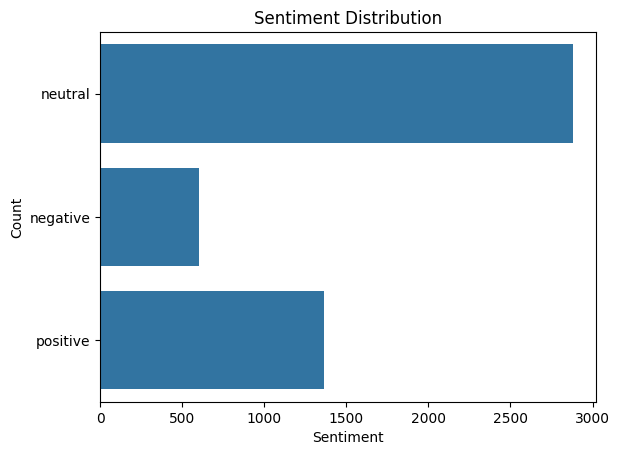

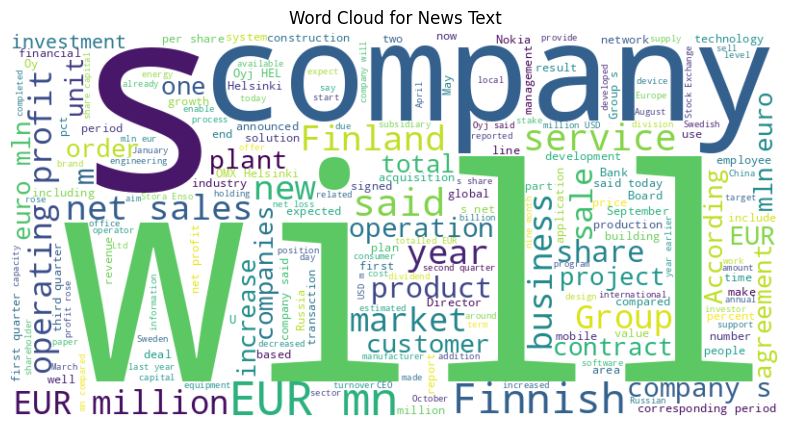

In [7]:
#4. data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['neutral'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
from wordcloud import WordCloud

text_data = ' '.join(data['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News Text')
plt.show()




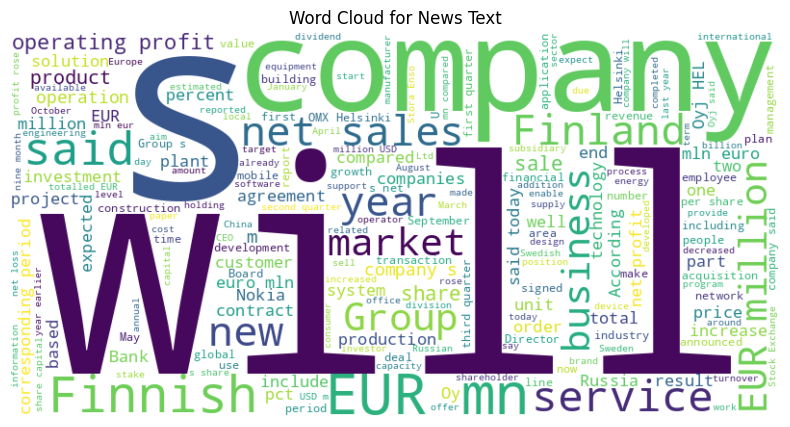

In [11]:
#5. Data Preprocessing
text_column_name = 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'
text_data = ' '.join(data[text_column_name])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News Text')
plt.show()


In [12]:
#6. Define Target Variable (y) and Feature Variables (X)
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text
text_column_name = 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'
data['cleaned_headline'] = data[text_column_name].apply(clean_text)
print(data['cleaned_headline'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    technopolis plans develop stages area less squ...
1    international electronic industry company elco...
2    new production plant company would increase ca...
3    according company updated strategy years baswa...
4    financing aspocomp growth aspocomp aggressivel...
Name: cleaned_headline, dtype: object


In [13]:
#7. Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

X = data['cleaned_headline']
y = data['neutral']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 8: Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [15]:
##9. Modeling
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
train_accuracy = model.score(X_train_tfidf, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 0.85


In [16]:
#10. Model Evaluation
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.40      0.52       115
     neutral       0.72      0.94      0.81       567
    positive       0.78      0.45      0.57       287

    accuracy                           0.73       969
   macro avg       0.74      0.59      0.63       969
weighted avg       0.74      0.73      0.70       969

[[ 46  59  10]
 [  9 531  27]
 [  8 151 128]]


In [17]:
# Step 11: Save the Model (Optional)
joblib.dump(model, 'sentiment_model.pkl')
print("Model saved as 'sentiment_model.pkl'.")

Model saved as 'sentiment_model.pkl'.


In [18]:
# Step 12: Load the Model (Optional)
loaded_model = joblib.load('sentiment_model.pkl')

In [19]:
# Step 13: Make Predictions with New Data (Optional)
new_data = ["Your new text here"]
new_data_cleaned = [clean_text(text) for text in new_data]
new_data_tfidf = tfidf.transform(new_data_cleaned)

# Make predictions
predictions = loaded_model.predict(new_data_tfidf)
print(predictions)

['neutral']
